In [1]:
from latools import *
from sympy import *
init_printing(use_latex=True)

# Bases of a Vector Space
## Example 1
Determine if the set of vectors:
$$
\mathbf{v}_1=\begin{bmatrix}1\\2\\4\end{bmatrix},\quad
\mathbf{v}_2=\begin{bmatrix}2\\3\\-2\end{bmatrix},\quad
\mathbf{v}_1=\begin{bmatrix}1\\2\\4\end{bmatrix}
$$
is a basis of $\mathbb{R}^3$.

_Solution_: We start by checking if the give set spans $\mathbb{R}^3$, that is, if we can always find $c_1$, $c_2$ and $c_3$ such that
$$
\begin{bmatrix}x\\y\\z\end{bmatrix}=c_1\mathbf{v}_1+c_3\mathbf{v}_2+c_3\mathbf{v}_3
$$
To do this, we have to solve the system with augmented matrix:

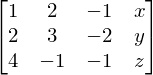

In [2]:
x,y,z = symbols('x,y,z')
A = matrix_to_rational([[1,  2, -1, x],
                        [2,  3, -2, y],
                        [4, -1, -1, z]])
A

The RREF of the matrix is:

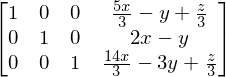

In [3]:
R = reduced_row_echelon_form(A, extra_cols=1)
R

From this RREF we see that we can always find $c_1$, $c_2$, $c_3$ for any given values of $x$, $y$, $z$. It follows that this set of vectors spans $\mathbb{R}^3$. 

To check that the set of vectors is linearly independent, just notice that, ignoring the last column, there are no free variables in the left three columns of matrix $R$. This implies that the only solution of $c_1\mathbf{v}_1+c_3\mathbf{v}_2+c_3\mathbf{v}_3=\mathbf{0}$ is $c_1=c_2=c_3=0$, and the vectors are linearly independent.

## Example 2
Determine if the vectors below span $\mathbf{R}^4$:
$$
\mathbf{v}_1=\begin{bmatrix}1\\2\\0\\-1\end{bmatrix},\quad
\mathbf{v}_2=\begin{bmatrix}3\\-1\\4\\0\end{bmatrix},\quad
\mathbf{v}_3=\begin{bmatrix}1\\1\\1\\2\end{bmatrix}
$$

_Solution_: As above, we attempt to solve the system with augmented matrix:

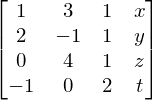

In [4]:
x,y,z,t = symbols('x,y,z,t')
A = matrix_to_rational([[ 1,  3, 1, x],
                        [ 2, -1, 1, y],
                        [ 0,  4, 1, z],
                        [-1,  0, 2, t]])
A

The RREF is:

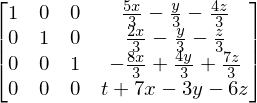

In [5]:
R = reduced_row_echelon_form(A, extra_cols=1)
R

Notice the last line, which corresponds to the equation:
\[
0=t+7x-3y-6z
\]
This equation is impossible if the expression in the right is not zero. We conclude that the given set _does not span $\mathbb{R}^4$. 

The procedure above gives the same result for any set of three or fewer vectors in $\mathbb{R}^4$. This illustrates the general principle:

__Proposition__. A set with fewer than $n$ vectors cannot span $\mathbb{R}^n$

## Example 3
Determine if the vectors below are linearly independent in $\mathbb{R}^2$:
$$
\mathbf{v}_1=\begin{bmatrix}1\\1\end{bmatrix},\quad
\mathbf{v}_2=\begin{bmatrix}-1\\2\end{bmatrix},\quad
\mathbf{v}_1=\begin{bmatrix}-3\\0\end{bmatrix}
$$

_Solution_: We have to solve the homogeneous system $c_1\mathbf{v}_1+c_2\mathbf{v}_2+c_3\mathbf{v}_3=\mathbf{0}$. The matrix of the system (not augmented) is:

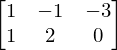

In [6]:
A = matrix_to_rational([[1, -1, -3],
                        [1,  2,  0]])
A

This yields the RREF:

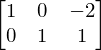

In [7]:
R = reduced_row_echelon_form(A)
R

This has a free variable, $c_3$, so there are nonzero solutions, and the vectors are linearly dependent. It is easy to see that this will always be the case if we have 3 or more vectors in $\mathbf{R}^2$. This illustrated the following general fact:

__Proposition__. A set of more than $n$ vectors in $\mathbf{R}^n$ is always linearly dependent.

## Example 4

Suppose we have an ordered basis of $\mathbb{R}^3$, $B=(\mathbf{v}_1, \mathbf{v}_2, \mathbf{v}_3)$, where:
$$
\mathbf{v}_1=\left[\begin{matrix}2\\0\\1\end{matrix}\right],\quad
\mathbf{v}_2=\left[\begin{matrix}1\\-3\\1\end{matrix}\right],\quad
\mathbf{v}_3=\left[\begin{matrix}1\\1\\1\end{matrix}\right]
$$

Let's define the three vectors in Python

In [8]:
v1 = Matrix([2,  0, 1])
v2 = Matrix([1, -3, 1])
v3 = Matrix([1,  1, 1])

Construct the matrix $P$ by placing the vectors in its columns:
$$
P=\begin{bmatrix}2&1&1\\0&-3&1\\1&1&1\end{bmatrix}
$$
We can construct this matrix in Python with the following code:

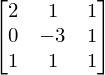

In [9]:
P = Matrix.hstack(v1,v2,v3)
P

The matrix $P$ is the _change of basis_ matrix from basis $B$ to the standard basis $E$. This means that:
$$
[u]_E=P[u]_B
$$
Where:

- $[u]_E$ are the coordinates of $u$ in the standard basis.
- $[u]_B$ are the coordinates of $u$ in the basis $B$

Then, we also have:
$$
[u]_B=P^{-1}[u]_E
$$
This means that $P^{-1}$ is the change of basis matrix from basis $E$ to basis $B$. For example, suppose that:
$$
[\mathbf{u}]_E=\begin{bmatrix}2\\-1\\1\end{bmatrix}_E
$$
Then to find the coordinates of $\mathbf{u}$ in basis $B$ we compute $P^{-1}[\mathbf{u}]_E$

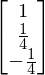

In [10]:
u = Matrix([2,-1,1])
P**(-1) * u 

We can verify that this is correct by computing the corresponding linear combination of the vectors in the basis:

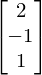

In [11]:
1*v1 + sympify('1/4')*v2 - sympify('1/4')*v3

Next suppose that we have a linear transformation $L:\mathbb{R}^3\to\mathbb{R}^3$ given by:
$$
L\left(\begin{bmatrix}x\\y\\z\end{bmatrix}_E\right)=
\left[\begin{matrix}- \frac{17}{2} & \frac{1}{2} & 13\\- \frac{3}{2} & \frac{7}{2} & 3\\- \frac{13}{2} & \frac{1}{2} & 11\end{matrix}\right]
\begin{bmatrix}x\\y\\z\end{bmatrix}_E
$$
Notice that, in the expression above, all coordinates are in the _standard basis_.

Recall that above we defined a basis $\mathbb{R}^3$, $B=(\mathbf{v}_1, \mathbf{v}_2, \mathbf{v}_3)$.

We want to find the matrix that represents the linear transformation $L$ using $B$ as input basis and $E$ as output basis. This is particularly easy, all we have to do is to construct the matrix:
$$
M=\begin{bmatrix}[L(\mathbf{v}_1)]_E&[L(\mathbf{v}_2)]_E&L([\mathbf{v}_3)]_E\end{bmatrix}
$$
Then, 
$$
[L(\mathbf{u})]_E = M[\mathbf{u}]_B
$$
We do this in the following cells. First, set up the matrix that defines $L$:

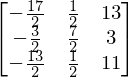

In [12]:
A = matrix_to_rational([[-17/2, 1/2, 13],
                        [ -3/2, 7/2,  3],
                        [-13/2, 1/2, 11]])
A

Then compute $L$ applied to the vectors in the basis $B$:

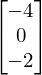

In [13]:
Lv1 = A*v1
Lv1

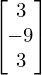

In [14]:
Lv2 = A*v2
Lv2

In [15]:
Lv3 = A*v3
Lv3

The matrix of the linear transformation has the vectors we computed above on its columns:

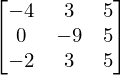

In [16]:
M=Matrix.hstack(Lv1,Lv2,Lv3)
M

We are now ready to compute the matrix of the linear transformation from the input basis $B$ to the input basis $B$. We just have to put together two formulas that we saw before:
$$
[L(u)]_E=M[u]_B
$$
and
$$
[L (u)]_B=P^{-1}[L(u)]_E
$$
Putting these two formulas together we have:
$$
[L (u)]_B=P^{-1}[L(u)]_E=P^{-1}M[u]_B
$$
So, the matrix we seek is $P^{-1}M$:

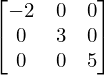

In [17]:
P**(-1)*M

We notice the remarkable fact that this matrix is diagonal, that is, the linear transformation $L$ has a specially simple representation in the basis $B$. The next topic we will study is how to find these basis that make the representation of a linear transformation very simple.